In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CSV file
md = pd.read_csv("md.csv")

# Display a summary of the data
print(md.describe())

# Prepare the design matrix (X) and response variable (y)
X = md[['youtube']]
X = sm.add_constant(X)  # Adds an intercept (constant term) named 'const'
y = md['sales']

# Fit the linear regression model using statsmodels' OLS
model_youtube = sm.OLS(y, X).fit()

# View the model summary
print(model_youtube.summary())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.55e-36
Time:                        00:40:11   Log-Likelihood:                -476.41
No. Observations:                 171   

In [14]:
# Predict for a new data point (youtube = 85.00)
new_data = pd.DataFrame({'youtube': [85.00]})
new_data = sm.add_constant(new_data, has_constant='add')
new_data = new_data[X.columns]  # Ensure column order is same as X
pred_value = model_youtube.predict(new_data)
print("Predicted sales for youtube=85.00:", pred_value.values[0])

# Create prediction results for the original dataset
predictions = model_youtube.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)

# Combine the predictions into the original dataset with unique column names
md['fit'] = pred_summary['mean']
md['conf_lower'] = pred_summary['mean_ci_lower']
md['conf_upper'] = pred_summary['mean_ci_upper']
md['pred_lower'] = pred_summary['obs_ci_lower']
md['pred_upper'] = pred_summary['obs_ci_upper']

# Sort the DataFrame by the predictor 'youtube' for smooth line plotting
md_sorted = md.sort_values(by='youtube')

Predicted sales for youtube=85.00: 12.439063211859088


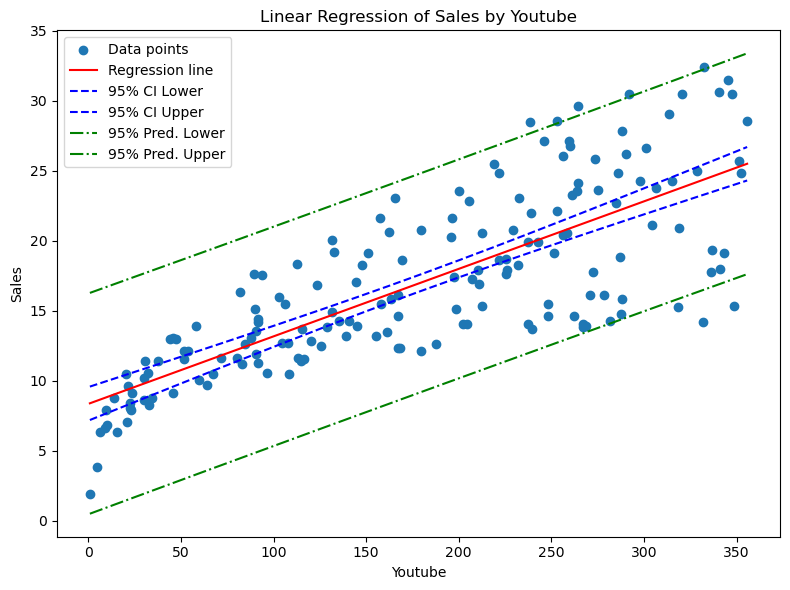

In [15]:
# Plot the scatter plot with the regression line and intervals
plt.figure(figsize=(8, 6))
plt.scatter(md_sorted['youtube'], md_sorted['sales'], label='Data points')
plt.plot(md_sorted['youtube'], md_sorted['fit'], color='red', label='Regression line')

# Uncomment the following lines to plot the confidence and prediction intervals:
plt.plot(md_sorted['youtube'], md_sorted['conf_lower'], color='blue', linestyle='dashed', label='95% CI Lower')
plt.plot(md_sorted['youtube'], md_sorted['conf_upper'], color='blue', linestyle='dashed', label='95% CI Upper')
plt.plot(md_sorted['youtube'], md_sorted['pred_lower'], color='green', linestyle='dashdot', label='95% Pred. Lower')
plt.plot(md_sorted['youtube'], md_sorted['pred_upper'], color='green', linestyle='dashdot', label='95% Pred. Upper')

plt.title("Linear Regression of Sales by Youtube")
plt.xlabel("Youtube")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()